# Green's Theorem solutions for hard-shpere equations

In [1]:
import numpy as np
import scipy as sc
import scipy.special
import math
import matplotlib.pyplot as plt

The solution for hard-sphere equation for $a > 0$ and $a < 0$ is given by Eq. 34 of Donnerts paper 

In [2]:
def mu(a):
    return((1+(((3+a)**2)/4))**0.5)


In [3]:
def psi(x, x0, a):
    y = 1./x
    y0 = 1./x0
    m = mu(a)
    s = np.exp(y/y0)
    if(x<x0):
        r=sc.special.hyp1f1(m+((1-a)/2),1+(2*m),y0)
        t=sc.special.hyperu(m+((1-a)/2),1+(2*m),y)
        if(a>0):
            return t*r
        else:
            return t*r*s
    else:
        r=sc.special.hyp1f1(m+((1-a)/2),1+(2*m),y)
        t=sc.special.hyperu(m+((1-a)/2),1+(2*m),y0)
        if(a>0):
            return t*r
        else:
            return t*r*s

In [4]:
def nss(x, x0, a):
    y = 1./x
    y0 = 1./x0
    m=mu(a)
    j=sc.special.gamma(m-((a+1)/2))
    k=sc.special.gamma(1+2*m)
    l=np.exp(-y0)
    z=(j*l*pow(y0,m+((a+1)/2))*pow(y,m+((1-a)/2))*psi(x, x0, a))/k
        
    return z


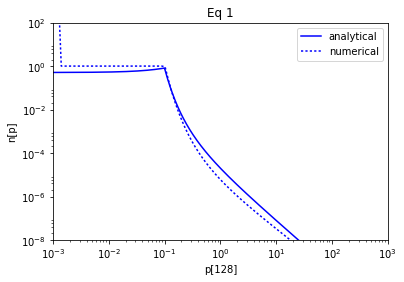

In [6]:
x0=0.1
a=1.0
con1=[]
x_arr = np.logspace(-3.0,3.0,512)
for x in x_arr:
    con=nss(x,x0,a)
    con1.append(con)
plt.loglog(x_arr,con1,'-',color='blue',label='analytical')
f,p= np.loadtxt('time_001000.txt',usecols=[0,1],unpack=True)
plt.loglog(f,p,':',color='blue',label='numerical')
plt.axis([pow(10,-3),pow(10,3),pow(10,-8),pow(10,2)])
plt.ylim(pow(10,-8),pow(10,2))
plt.xlabel('p[128]')
plt.ylabel('n[p]')
plt.title('Eq 1')
plt.legend()
np.savetxt('Eq_1.txt',np.column_stack([x_arr,con1]),fmt='%1.4e')
plt.show()

The solution for a hard-sphere equation with strongly
varying escape function is given by Eq.40 of Donnert's paper

In [8]:
def mu1(alpha,a):
    o=(1+a)/(2*alpha)
    return abs(o)

In [9]:
def phi(x, x0, alpha, a, beta):
    m=mu1(alpha,a)
    y=beta*math.pow(x,alpha)
    y0=beta*math.pow(x0,alpha)
    if(y<y0):
        k=scipy.special.kv(m,y0)
        i=scipy.special.iv(m,y)
        return i*k
    else:
        k=scipy.special.kv(m,y)
        i=scipy.special.iv(m,y0)
        return i*k
        

In [10]:
def n(x, x0, alpha, a):
    p=phi(x, x0, alpha, a, beta)
    t1=1/abs(alpha)
    t2=pow(x,(-1+a)/2)
    t3=pow(x0,(-1-a)/2)
    return t1*t2*t3*p

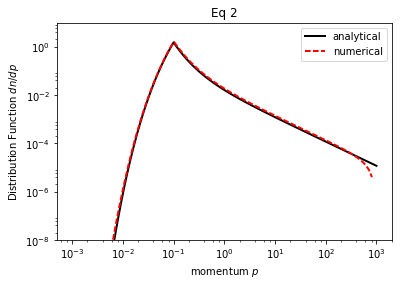

In [17]:
alpha=-0.5
beta=1./abs(alpha)
a=1.0
x0=0.1
ar1=[]
x_arr = np.logspace(-3.0,3.0,100)
for x in x_arr:
    ar=n(x,x0,alpha,a)
    ar1.append(ar)
plt.loglog(x_arr,ar1,'-',color='black',label='analytical',lw=2)
f,p= np.loadtxt('time_0100002.txt',usecols=[0,1],unpack=True)
plt.loglog(f,p,'--',color='red',label='numerical',lw=2)
plt.ylim(pow(10,-8),pow(10,1))
plt.xlabel('momentum $p$')
plt.ylabel('Distribution Function $dn/dp$')
plt.legend()
plt.title('Eq 2')
plt.show()


The time dependent solution for hard-sphere equation is given by Eq.44 of Donnert's paper 

In [12]:
def v(q,a,alpha):
    o1=(q-1+a)/(2*alpha)
    return abs(o1)

In [13]:
def n1(alpha,a,x,x0,t,q,theta):
    f=v(q,a,alpha)
    r1=1/(2*abs(alpha)*t)
    r2=pow(x,(1-q+a)/2)
    r3=pow(x0,(1-q-a)/2)
    r4=(pow(x,alpha)*pow(x0,alpha))/(2*pow(alpha,2)*t)
    r5=scipy.special.iv(f,r4)
    r6=np.exp((-(pow(x,2*alpha)+pow(x0,2*alpha)))/(4*pow(alpha,2)*t))
    r7=np.exp(-theta*t)
    return r1*r2*r3*r5*r6*r7

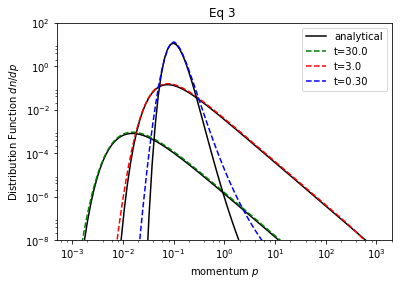

In [20]:
a=1
q=3
s=0
x0=0.1
theta=1
alpha=0.5*(2-q-s)
br1=[]
cr1=[]
dr1=[]
x_arr1 = np.logspace(-3.0,3.0,100)
t=30.0
for x in x_arr1:
    dr=n1(alpha,a,x,x0,t,q,theta)*pow(10,11)
    dr1.append(dr)
plt.loglog(x_arr1,dr1,'-',color='black',label='analytical')
p,r= np.loadtxt('time_0100003.txt',usecols=[0,1],unpack=True)
r=r*pow(10,11)
plt.loglog(p,r,'--',color='green',label='t=30.0')
t=3.0
for x in x_arr1:
    br=n1(alpha,a,x,x0,t,q,theta)
    br1.append(br)
plt.loglog(x_arr1,br1,'-', color='black',)
p,r= np.loadtxt('time_0010003.txt',usecols=[0,1],unpack=True)
plt.loglog(p,r,'--',color='red',label='t=3.0')
t=0.30
for x in x_arr1:
    cr=n1(alpha,a,x,x0,t,q,theta)
    cr1.append(cr)
plt.loglog(x_arr1,cr1,'-',color='black',)
p,r= np.loadtxt('time_0001003.txt',usecols=[0,1],unpack=True)
plt.loglog(p,r,'--',color='blue',label='t=0.30')
plt.ylim(pow(10,-8),pow(10,2))
plt.legend()
plt.xlabel('momentum $p$')
plt.ylabel('Distribution Function $dn/dp$')
plt.title('Eq 3 ')
plt.legend()
plt.show()

NOTE : The curve for t=30 has been mutiplied with $10 ^ {11}$ for clarity

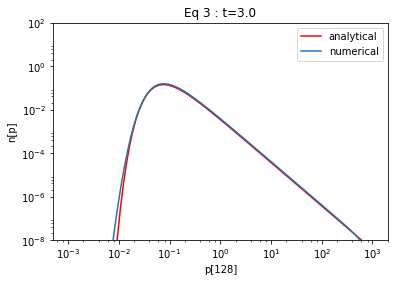

In [15]:
a=1
q=3
s=0
x0=0.1
theta=1
alpha=0.5*(2-q-s)
br1=[]
cr1=[]
dr1=[]
x_arr1 = np.logspace(-3.0,3.0,100)
t=3.0
for x in x_arr1:
    br=n1(alpha,a,x,x0,t,q,theta)
    br1.append(br)
plt.loglog(x_arr1,br1,'-',color='red',label='analytical')
p,r= np.loadtxt('time_0010003.txt',usecols=[0,1],unpack=True)
plt.loglog(p,r,label='numerical')
plt.ylim(pow(10,-8),pow(10,2))
plt.legend()
plt.xlabel('p[128]')
plt.ylabel('n[p]')
plt.title('Eq 3 : t=3.0')
np.savetxt('Eq_3_2.txt',np.column_stack([x_arr1,br1]),fmt='%1.4e')
plt.show()

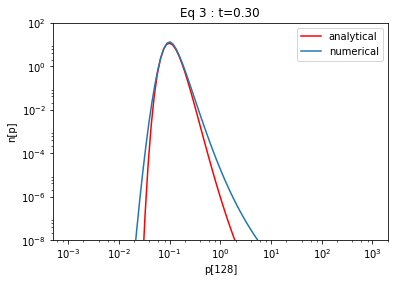

In [16]:
a=1
q=3
s=0
x0=0.1
theta=1
alpha=0.5*(2-q-s)
br1=[]
cr1=[]
dr1=[]
x_arr1 = np.logspace(-3.0,3.0,100)
t=0.30
for x in x_arr1:
    cr=n1(alpha,a,x,x0,t,q,theta)
    cr1.append(cr)
plt.loglog(x_arr1,cr1,'-',color='red',label='analytical')
p,r= np.loadtxt('time_0001003.txt',usecols=[0,1],unpack=True)
plt.loglog(p,r,label='numerical')
plt.ylim(pow(10,-8),pow(10,2))
plt.legend()
plt.xlabel('p[128]')
plt.ylabel('n[p]')
plt.title('Eq 3 : t=0.30')
np.savetxt('Eq_3_3.txt',np.column_stack([x_arr1,cr1]),fmt='%1.4e')
plt.show()